In [1]:
import torch #we will use this torch to create tensors to store all of the numerical values , including raw data and the values for each weights and biases
import torch.nn as nn #make the weight and bias tensors to be part of the neaural network
import torch.nn.functional as F #which gives us the activation functions
from torch.optim import SGD #Optimizer stochastic gradient descent 

import lightning as L 
from torch.utils.data import TensorDataset,DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: 'Could not find module 'C:\Users\enesm\OneDrive\Masaüstü\Python39\Lib\site-packages\torchvision\image.pyd' (or one of its dependencies). Try using the full path with constructor syntax.'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


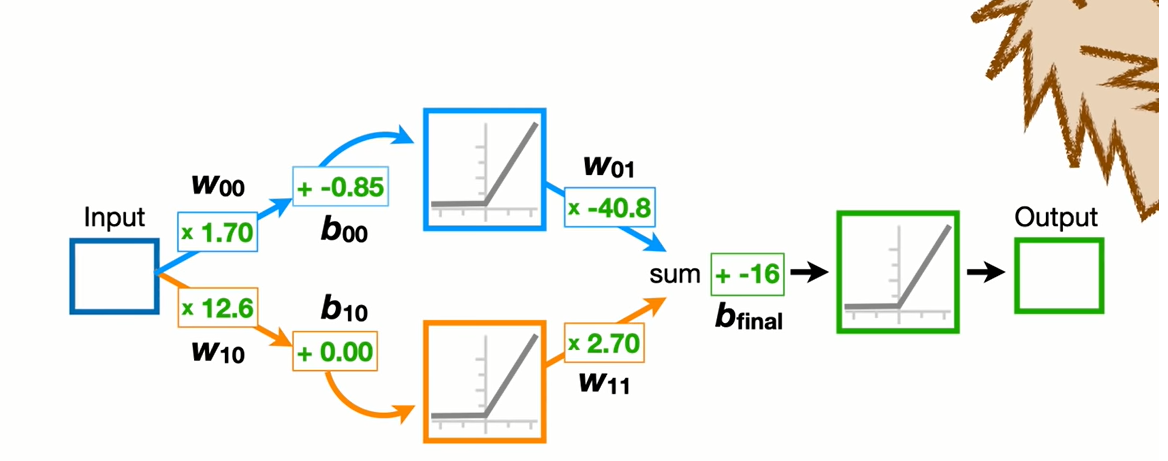

In [2]:
class BasicLightning(L.LightningModule):
    def __init__(self):
        super().__init__()
        self.w00=nn.Parameter(torch.tensor(1.7),requires_grad=False)
        self.b00=nn.Parameter(torch.tensor(-0.85),requires_grad=False)
        self.w01=nn.Parameter(torch.tensor(-40.8),requires_grad=False)
       
        self.w10=nn.Parameter(torch.tensor(12.6),requires_grad=False)
        self.b10=nn.Parameter(torch.tensor(0.0),requires_grad=False)
        self.w11=nn.Parameter(torch.tensor(2.7),requires_grad=False)
       
        self.final_bias=nn.Parameter(torch.tensor(-16.),requires_grad=False)
    def forward(self,input):
        
        input_to_top_relu=input*self.w00+self.b00
        top_relu_output=F.relu(input_to_top_relu)
        scaled_top_relu_output=top_relu_output*self.w01

        input_to_bottom_relu=input*self.w10+self.b10
        bottom_relu_output=F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output=bottom_relu_output*self.w11

        input_to_final_relu=scaled_top_relu_output+scaled_bottom_relu_output+self.final_bias

        output=F.relu(input_to_final_relu)

        return output 

In [3]:
input_doses=torch.linspace(start=0,end=1,steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

In [4]:
model=BasicLightning()

output_values=model(input_doses)

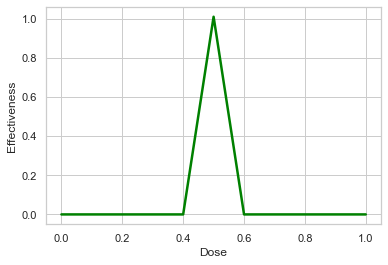

In [6]:
sns.set(style='whitegrid')
sns.lineplot(x=input_doses,
             y=output_values,
             linewidth=2.5,
             color='green')
plt.xlabel('Dose')
plt.ylabel('Effectiveness');

Now we will use lightning to find the optimal value for b_final

In [9]:
class BasicLightningTrain(L.LightningModule):
    def __init__(self):
        super().__init__()
        self.w00=nn.Parameter(torch.tensor(1.7),requires_grad=False)
        self.b00=nn.Parameter(torch.tensor(-0.85),requires_grad=False)
        self.w01=nn.Parameter(torch.tensor(-40.8),requires_grad=False)
       
        self.w10=nn.Parameter(torch.tensor(12.6),requires_grad=False)
        self.b10=nn.Parameter(torch.tensor(0.0),requires_grad=False)
        self.w11=nn.Parameter(torch.tensor(2.7),requires_grad=False)
       
        self.final_bias=nn.Parameter(torch.tensor(0.),requires_grad=True)

        self.learning_rate=0.01 #Note! = This value is just a placeholder and doesn't matter what value it is for now!
    def forward(self,input):
        
        input_to_top_relu=input*self.w00+self.b00
        top_relu_output=F.relu(input_to_top_relu)
        scaled_top_relu_output=top_relu_output*self.w01

        input_to_bottom_relu=input*self.w10+self.b10
        bottom_relu_output=F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output=bottom_relu_output*self.w11

        input_to_final_relu=scaled_top_relu_output+scaled_bottom_relu_output+self.final_bias

        output=F.relu(input_to_final_relu)

        return output 

In [10]:
model=BasicLightningTrain()

output_values=model(input_doses)

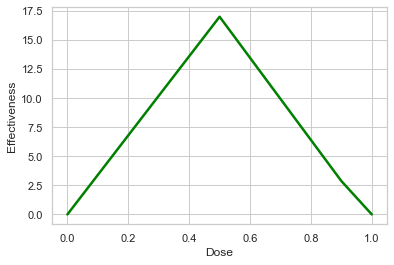

In [11]:
sns.set(style='whitegrid')
sns.lineplot(x=input_doses,
             y=output_values.detach(),
             linewidth=2.5,
             color='green')
plt.xlabel('Dose')
plt.ylabel('Effectiveness');

# Creating Training Data and DataLoader

In [19]:
#Let's create the training data
inputs=torch.tensor([0.,0.5,1.]*100)
labels=torch.tensor([0.,1.,0.]*100)
#However now we will use lightning we need to wrap the training data in a DataLoader.check_worker_number_rationality
dataset=TensorDataset(inputs,labels)
dataloader=DataLoader(dataset)
#DataLoaders are super useful when we have a lot of data because:
#1)They make it easier to acces data in batches
#2)They make it easy to shuffle the data each epoch
#3)They make it easy to use a small fraction of the data when we want to do a fast dirty training for debugging

###Now we are ready to optimize b_final

Last NN

In [20]:
class BasicLightningTrain(L.LightningModule):
    def __init__(self):
        super().__init__()
        self.w00=nn.Parameter(torch.tensor(1.7),requires_grad=False)
        self.b00=nn.Parameter(torch.tensor(-0.85),requires_grad=False)
        self.w01=nn.Parameter(torch.tensor(-40.8),requires_grad=False)
       
        self.w10=nn.Parameter(torch.tensor(12.6),requires_grad=False)
        self.b10=nn.Parameter(torch.tensor(0.0),requires_grad=False)
        self.w11=nn.Parameter(torch.tensor(2.7),requires_grad=False)
       
        self.final_bias=nn.Parameter(torch.tensor(0.),requires_grad=True)

        self.learning_rate=0.01 #Note! = This value is just a placeholder and doesn't matter what value it is for now!
    def forward(self,input):
        
        input_to_top_relu=input*self.w00+self.b00
        top_relu_output=F.relu(input_to_top_relu)
        scaled_top_relu_output=top_relu_output*self.w01

        input_to_bottom_relu=input*self.w10+self.b10
        bottom_relu_output=F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output=bottom_relu_output*self.w11

        input_to_final_relu=scaled_top_relu_output+scaled_bottom_relu_output+self.final_bias

        output=F.relu(input_to_final_relu)

        return output 
    def configure_optimizers(self):
        return SGD(self.parameters(),lr=self.learning_rate)
    
    def training_step(self,batch,batch_idx):
        input_i,label_i=batch
        output_i=self.forward(input_i)
        loss=(output_i-label_i)**2
        return loss     

# Learning Rate Optimizer

In [31]:
model=BasicLightningTrain()
#We create a trainer to first find a good value for learning rate and then we will use it to optimize or train our model
trainer=L.Trainer(max_epochs=34,accelerator='auto',devices='auto')#we selected 34 for epoch number and that's why we use it but if we wouldn't know lightning would let us add additional epochs we don't have to start over
tuner = L.pytorch.tuner.Tuner(trainer)
lr_find_results=tuner.lr_find(model,
                              train_dataloaders=dataloader,
                              min_lr=0.001,
                              max_lr=1,
                              early_stop_threshold=None)
new_lr=lr_find_results.suggestion()
print(f'lr_find() suggest {new_lr:.5f} for the learning rate')
model.learning_rate = new_lr 

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_steps=100` reached.
Learning rate set to 0.002137962089502232
Restoring states from the checkpoint path at c:\Users\enesm\OneDrive\Masaüstü\My_Deep_Learning_Journey\PyTorch\.lr_find_73490d3f-c27b-4499-b796-08240e05e1ed.ckpt
Restored all states from the checkpoint at c:\Users\enesm\OneDrive\Masaüstü\My_Deep_Learning_Journey\PyTorch\.lr_find_73490d3f-c27b-4499-b796-08240e05e1ed.ckpt


lr_find() suggest 0.00214 for the learning rate


In [27]:
trainer.fit(model, train_dataloaders=dataloader)
print(model.final_bias.data)


  | Name | Type | Params
------------------------------
------------------------------
1         Trainable params
6         Non-trainable params
7         Total params
0.000     Total estimated model params size (MB)
c:\Users\enesm\OneDrive\Masaüstü\Python39\lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:430: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=34` reached.


tensor(-16.0098)


# Let's visualize 

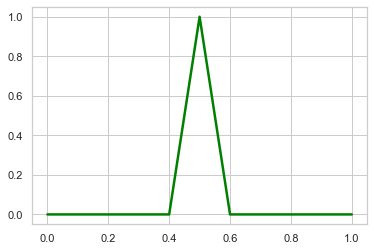

In [29]:
output_values=model(input_doses)
sns.set(style='whitegrid')
sns.lineplot(x=input_doses,y=output_values.detach(),color='green',linewidth=2.5)
plt.xlabel='dose',
plt.ylabel='effect'